## Explore Percentage of individuals receiving federal loans

Now we will focus on if the percent of all undergraduate students receiving federal student loan affect the the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions". We can filter out the related data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from tools.utils import combine_columns, compute_feature_importance, standard_units

In [2]:
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv").drop('Unnamed: 0', axis=1)

In [3]:
tuition_data = data[['RET_FT4', 'RET_FTL4', 'TUITIONFEE_IN','TUITIONFEE_OUT']]

In [4]:
# data only with tuition fee of in state and out state, four-year institutions and less than four-year institutions
percent_loan_data = data[['RET_FT4', 'RET_FTL4', 'PCTFLOAN']]
percent_loan_data.head()

,RET_FT4,RET_FTL4,PCTFLOAN
0,0.5403,NaN,0.7504
1,0.8640,NaN,0.4688
2,0.5000,NaN,0.8493
3,0.8180,NaN,0.3855
4,0.6202,NaN,0.7805


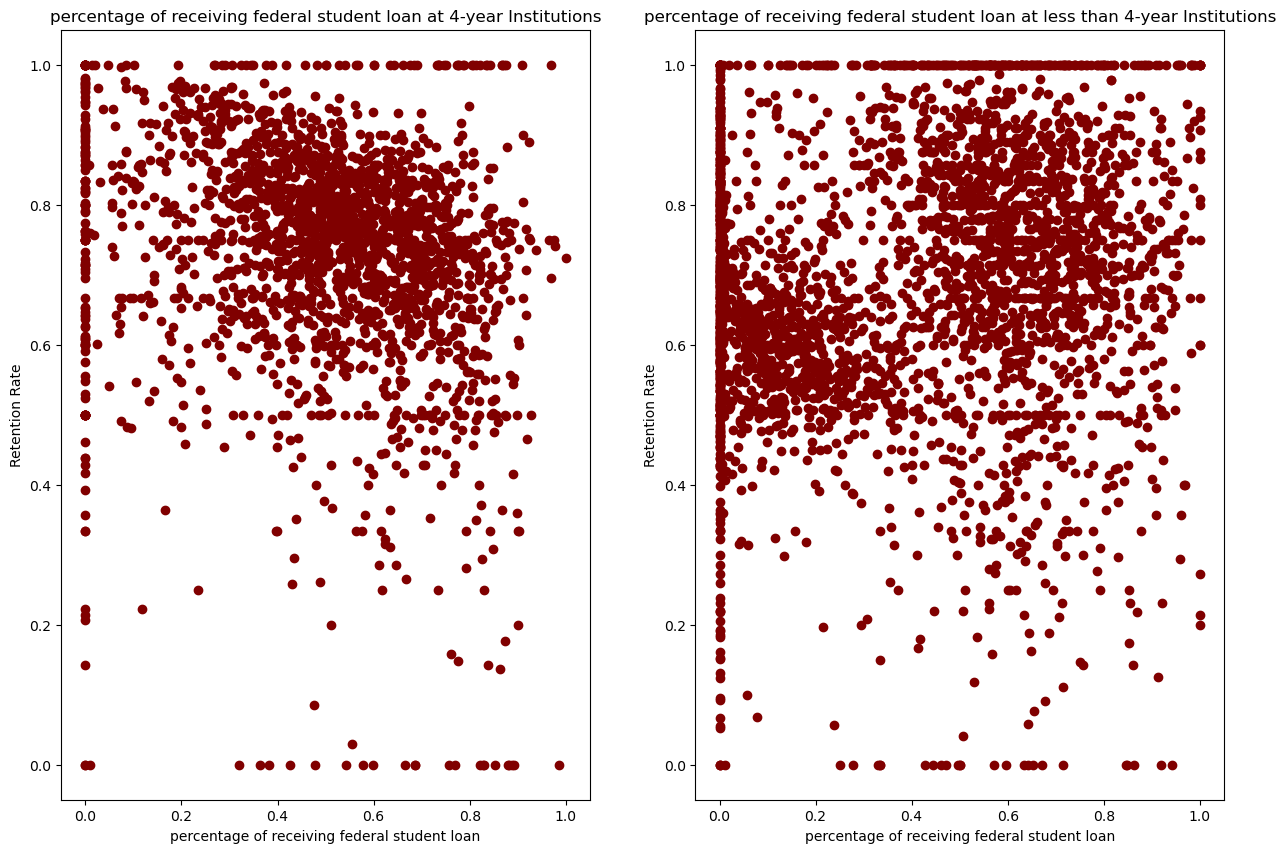

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
fig.suptitle('')

ax1.set_title('percentage of receiving federal student loan at 4-year Institutions')
ax1.set_xlabel('percentage of receiving federal student loan')
ax1.set_ylabel('Retention Rate')
ax1.scatter(percent_loan_data.PCTFLOAN, percent_loan_data.RET_FT4,color ='maroon')

ax2.set_title('percentage of receiving federal student loan at less than 4-year Institutions')
ax2.set_xlabel('percentage of receiving federal student loan')
ax2.set_ylabel('Retention Rate')
ax2.scatter(percent_loan_data.PCTFLOAN, percent_loan_data.RET_FTL4,color ='maroon')

plt.savefig('figures/retention_percentage_federal_loan.png')
plt.show()

In [6]:
standard_percent_loan_data = tuition_data.assign(standard_RET_FT4=standard_units(percent_loan_data.RET_FT4),
                       standard_RET_FTL4=standard_units(percent_loan_data.RET_FTL4),
                       standard_percent_loan=standard_units(percent_loan_data.PCTFLOAN))
standard_percent_loan_data
# the correlation coefficient(r) of percentage of receiving federal student loan at 4-year Institutions
r_percent_loan_4year = np.mean(standard_percent_loan_data.standard_RET_FT4 * standard_percent_loan_data.standard_percent_loan)
print("The correlation coefficient of percentage of receiving federal student loan at 4-year Institutions is "+ str(r_percent_loan_4year))
# the correlation coefficient(r) of percentage of receiving federal student loan at less than 4-year Institutions
r_percent_loan_l4year = np.mean(standard_percent_loan_data.standard_RET_FTL4 * standard_percent_loan_data.standard_percent_loan)
print("The correlation coefficient of percentage of receiving federal student loan at less than 4-year Institutions is "+str(r_percent_loan_l4year))

The correlation coefficient of percentage of receiving federal student loan at 4-year Institutions is -0.1654776936242682
The correlation coefficient of percentage of receiving federal student loan at less than 4-year Institutions is 0.14346890122719802


**By the scatter above and the correlation coefficient,we think the percentage of receiving federal student loan at 4-year Institutions and less than 4-year Institutions graph looks like not really match the positive or negative relationship with retention rate. Therefore, we think the percentage of receiving federal student loan at 4-year or less than 4-year Institutions not really influence student's retention rate.**